# Campo de Dados do DF
1. TIPOPERIODO: Pode indicar o tipo de período relacionado à safra
2. PERIODO: Indica o período da safra, geralmente no formato "ANO/ANO" para mostrar o início e o fim da safra.
3. AREATOTAL: Representa a área total relacionada ao cultivo.
4. MUNICIPIO: Refere-se ao nome do município onde o cultivo ocorre.
5. UF: Significa "Unidade da Federação" e indica o estado brasileiro em que o cultivo está localizado.
6. ESPECIE: Indica a espécie da planta cultivada.
7. CULTIVAR: Refere-se ao tipo ou variedade específica da planta.
8. AREAPLANTADA: Indica a área da terra onde a cultura foi efetivamente plantada.
9. AREAESTIMADA: Indica a área estimada para a safra, que pode ser diferente da área plantada devido a fatores como perdas de colheita.
10. QUANTRESERVADA: Mostra a quantidade reservada da cultura, possivelmente em unidades apropriadas (pode variar dependendo da cultura).
11. DATAPLANTIO: Indica a data de plantio da cultura. Geralmente, é fornecida no formato "DD/MM/AAAA HH:MM", indicando o dia, o mês, o ano e a hora do plantio.

# Campo de Dados do DF1

1. SAFRA: Refere-se ao ano da safra agrícola.
2. ESPÉCIE: Indica a espécie da cultura ou planta cultivada.
3. CATEGORIA: Indica a categoria ou variedade da cultura, como S1, S2, C1, Básica, Genética, etc. Essas categorias podem se referir a diferentes estágios de desenvolvimento, variedades de plantas.
4. CULTIVAR: Refere-se ao nome ou código da variedade específica da cultura que foi cultivada.
5. MUNICÍPIO: Indica o município onde a cultura foi cultivada.
6. UF: Representa o estado (Unidade da Federação) onde a cultura foi cultivada.
7. STATUS: Refere-se ao status da safra, que pode ser "Homologado" ou "Aprovado" ou outro.
8. DATA DO PLANTIO: Indica a data em que a cultura foi plantada.
9. DATA DE COLHEITA: Indica a data em que a cultura foi colhida.
10. ÁREA: Representa a área total em hectares onde a cultura foi cultivada.
11. PRODUÇÃO: Indica a quantidade total de produção colhida, geralmente em unidades como toneladas.
12. PRODUÇÃO ESTIMADA: Refere-se à estimativa da produção da safra.

# Import libraries

In [1]:
import pandas as pd 
import inflection
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import numpy as np

In [2]:
dataframe = pd.read_csv("C:/Users/User/Desktop/sigefdeclaracaoareaproducao.csv", sep=";", low_memory=False)
dataframe1 = pd.read_csv("C:/Users/User/Desktop/sigefcamposproducaodesementes.csv", sep=";", low_memory=False)

In [3]:
df = dataframe.copy()
df1 = dataframe1.copy()

# Copy?
#### Por conta de segurança, fazemos uma cópia do dataframe original para não mexermos nele

# Data Dimensions 

In [4]:
print( "Number of Rows: {}". format(df.shape[0])) 
print( "Number of Rows: {}". format(df.shape[1])) 

Number of Rows: 169646
Number of Rows: 11


In [5]:
print( "Number of Rows: {}". format(df1.shape[0])) 
print( "Number of Rows: {}". format(df1.shape[1])) 

Number of Rows: 449760
Number of Rows: 12


# Information from my data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169646 entries, 0 to 169645
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TIPOPERIODO     169646 non-null  object 
 1   PERIODO         169646 non-null  object 
 2   AREATOTAL       169646 non-null  float64
 3   MUNICIPIO       169646 non-null  object 
 4   UF              169646 non-null  object 
 5   ESPECIE         169646 non-null  object 
 6   CULTIVAR        169646 non-null  object 
 7   AREAPLANTADA    169646 non-null  object 
 8   AREAESTIMADA    169646 non-null  object 
 9   QUANTRESERVADA  169646 non-null  object 
 10  DATAPLANTIO     169646 non-null  object 
dtypes: float64(1), object(10)
memory usage: 14.2+ MB


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449760 entries, 0 to 449759
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   SAFRA              449760 non-null  object
 1   ESPECIE            449760 non-null  object
 2   CATEGORIA          449737 non-null  object
 3   CULTIVAR           449760 non-null  object
 4   MUNICIPIO          449755 non-null  object
 5   UF                 449760 non-null  object
 6   STATUS             449760 non-null  object
 7   DATA DO PLANTIO    449760 non-null  object
 8   DATA DE COLHEITA   133468 non-null  object
 9   AREA               449760 non-null  object
 10  PRODUCAO           133468 non-null  object
 11  PRODUCAO ESTIMADA  449760 non-null  object
dtypes: object(12)
memory usage: 41.2+ MB


# Rename Columns

In [8]:
df.columns


Index(['TIPOPERIODO', 'PERIODO', 'AREATOTAL', 'MUNICIPIO', 'UF', 'ESPECIE',
       'CULTIVAR', 'AREAPLANTADA', 'AREAESTIMADA', 'QUANTRESERVADA',
       'DATAPLANTIO'],
      dtype='object')

In [9]:
cols_old = ['TIPOPERIODO', 'PERIODO', 'AREATOTAL', 'MUNICIPIO', 'UF', 'ESPECIE',
       'CULTIVAR', 'AREAPLANTADA', 'AREAESTIMADA', 'QUANTRESERVADA',
       'DATAPLANTIO'] 

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old)) 

df.columns = cols_new

In [10]:
df.columns

Index(['tipoperiodo', 'periodo', 'areatotal', 'municipio', 'uf', 'especie',
       'cultivar', 'areaplantada', 'areaestimada', 'quantreservada',
       'dataplantio'],
      dtype='object')

In [11]:
df1.columns

Index(['SAFRA', 'ESPECIE', 'CATEGORIA', 'CULTIVAR', 'MUNICIPIO', 'UF',
       'STATUS', 'DATA DO PLANTIO', 'DATA DE COLHEITA', 'AREA', 'PRODUCAO',
       'PRODUCAO ESTIMADA'],
      dtype='object')

In [12]:
cols_old1 = ['SAFRA', 'ESPECIE', 'CATEGORIA', 'CULTIVAR', 'MUNICIPIO', 'UF',
       'STATUS', 'DATA DO PLANTIO', 'DATA DE COLHEITA', 'AREA', 'PRODUCAO',
       'PRODUCAO ESTIMADA']

snakecase1 = lambda x: inflection.underscore(x) 

cols_new1 = list(map(snakecase, cols_old1)) 

df1.columns = cols_new1 

In [13]:
df1.columns

Index(['safra', 'especie', 'categoria', 'cultivar', 'municipio', 'uf',
       'status', 'data do plantio', 'data de colheita', 'area', 'producao',
       'producao estimada'],
      dtype='object')

In [14]:
df.dtypes

tipoperiodo        object
periodo            object
areatotal         float64
municipio          object
uf                 object
especie            object
cultivar           object
areaplantada       object
areaestimada       object
quantreservada     object
dataplantio        object
dtype: object

# Preparating data

In [15]:
df['ano_inicio'] = df['periodo'].str.split('/').str[0]
df['ano_fim'] = df['periodo'].str.split('/').str[1]

# Criando uma coluna de data com base nos anos
df['data_inicio'] = pd.to_datetime(df['ano_inicio'], format='%Y')
df['data_fim'] = pd.to_datetime(df['ano_fim'], format='%Y')



# str.split?
#### = Este código divide a coluna 'periodo' em duas colunas separadas, 'ano_inicio' e 'ano_fim', onde os valores são o primeiro e o segundo elemento da string dividida. Em seguida, ele cria duas novas colunas, 'data_inicio' e 'data_fim', que contêm as datas correspondentes, usando o formato de ano com quatro dígitos. 

In [16]:
df.dtypes

tipoperiodo               object
periodo                   object
areatotal                float64
municipio                 object
uf                        object
especie                   object
cultivar                  object
areaplantada              object
areaestimada              object
quantreservada            object
dataplantio               object
ano_inicio                object
ano_fim                   object
data_inicio       datetime64[ns]
data_fim          datetime64[ns]
dtype: object

In [17]:
df.head(27)

tipoperiodo    periodo  areatotal                municipio  uf  \
0        SAFRA  2016/2017     140.00     Boa Vista do Cadeado  RS   
1        SAFRA  2016/2017      13.00            Mato Queimado  RS   
2        SAFRA  2016/2017      50.00              Paulo Bento  RS   
3        SAFRA  2016/2017    1200.00                Cruz Alta  RS   
4        SAFRA  2017/2017     800.00               Ponta Porã  MS   
5        SAFRA  2017/2018     200.00               Nova Palma  RS   
6        SAFRA  2017/2018      40.00               Ibirapuitã  RS   
7        SAFRA  2017/2018     605.00                  Amambaí  MS   
8        SAFRA  2017/2018     400.00   São Miguel das Missões  RS   
9        SAFRA  2017/2018     100.00                    Braga  RS   
10       SAFRA  2017/2018     250.00  Dois Irmãos das Missões  RS   
11       SAFRA  2017/2018     690.00   São Miguel das Missões  RS   
12       SAFRA  2017/2018     500.00              Paulo Bento  RS   
13       SAFRA  2016/2017      20.00                    Marau  RS   
14       SAFRA  2017/2018     439.00                    Lages  SC   
15       SAFRA  2017/2018      70.00              Entre-Ijuís  RS   
16       SAFRA  2016/2017      50.00            Pinhal Grande  RS   
17       SAFRA  2017/2018    1250.00                Papanduva  SC   
18       SAFRA  2017/2018      35.00                  Panambi  RS   
19       SAFRA  2016/2017     944.00       Júlio de Castilhos  RS   
20       SAFRA  2017/2018      92.00   São Miguel das Missões  RS   
21       SAFRA  2017/2017     931.52                 Belterra  PA   
22       SAFRA  2017/2018    2500.00              Tupanciretã  RS   
23       SAFRA  2017/2018     200.00            Muitos Capões  RS   
24       SAFRA  2017/2017    1250.00                Cruz Alta  RS   
25       SAFRA  2017/2018      60.00            Campos Borges  RS   
26       SAFRA  2016/2017     250.00              Tupanciretã  RS   

                   especie        cultivar areaplantada areaestimada  \
0   Glycine max (L.) Merr.    6160RSF IPRO          2.4         12.0   
1   Glycine max (L.) Merr.   63I64RSF IPRO         13.0         15.0   
2   Glycine max (L.) Merr.   58I60RSF IPRO          2.0         40.0   
3   Glycine max (L.) Merr.       M5917IPRO         80.0        300.0   
4   Glycine max (L.) Merr.      SYN9070 RR         40.0        800.0   
5   Glycine max (L.) Merr.     AS 3590IPRO         15.0        200.0   
6   Glycine max (L.) Merr.    NS 6909 IPRO         40.0         60.0   
7   Glycine max (L.) Merr.    7166RSF IPRO         30.0       2275.0   
8   Glycine max (L.) Merr.   68I70RSF IPRO         40.0        400.0   
9   Glycine max (L.) Merr.   SYN 1561 IPRO         42.0        100.0   
10  Glycine max (L.) Merr.   58I60RSF IPRO         40.0        200.0   
11  Glycine max (L.) Merr.    NS 5445 IPRO         60.0        680.0   
12  Glycine max (L.) Merr.    NS 6909 IPRO        200.0         20.0   
13  Glycine max (L.) Merr.    BMX ATIVA RR          3.0         20.0   
14  Glycine max (L.) Merr.    NS 5445 IPRO        150.0         15.0   
15  Glycine max (L.) Merr.    7166RSF IPRO         15.0         65.0   
16  Glycine max (L.) Merr.    NS 6909 IPRO         15.0         15.0   
17  Glycine max (L.) Merr.  Don Mario 5.9i        100.0        100.0   
18  Glycine max (L.) Merr.      BRS 5601RR          4.0         25.0   
19  Glycine max (L.) Merr.   TMG 7062 IPRO        107.0        200.0   
20  Glycine max (L.) Merr.      TMG 7262RR          8.0         80.0   
21  Glycine max (L.) Merr.       M8644IPRO        310.0      10000.0   
22  Glycine max (L.) Merr.    5855RSF IPRO        300.0        300.0   
23  Glycine max (L.) Merr.    5958RSF IPRO         25.0         75.0   
24    Triticum aestivum L.     BRS Parrudo        200.0        200.0   
25  Glycine max (L.) Merr.      NA 5909 RG          1.8         50.0   
26  Glycine max (L.) Merr.     AS 3570IPRO         20.0         50.0   

   quantreservada dataplantio ano_inicio ano_fim data

In [18]:
df['areaplantada'] = df['areaplantada'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['areaestimada'] = df['areaestimada'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['quantreservada'] = df['quantreservada'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

### Regex?
= o Pandas pode alertar que, em versões futuras, você deve especificar regex=False para evitar a interpretação das strings como expressões regulares. 

Uma pequena modificação no código para evitar o aviso, especificando regex=False nas chamadas .str.replace():

In [19]:
df.dtypes

tipoperiodo               object
periodo                   object
areatotal                float64
municipio                 object
uf                        object
especie                   object
cultivar                  object
areaplantada             float64
areaestimada             float64
quantreservada           float64
dataplantio               object
ano_inicio                object
ano_fim                   object
data_inicio       datetime64[ns]
data_fim          datetime64[ns]
dtype: object

In [20]:
df['dataplantio'] = df['dataplantio'].str.split(' ').str[0]

df['dataplantio'] = pd.to_datetime(df['dataplantio'], format='%d/%m/%Y', errors='coerce')
# O parâmetro 'errors' está definido como 'coerce', o que significa que, se ocorrerem erros na conversão, esses valores serão definidos como valores nulos

df['dataplantio'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

df['data_inicio'] = pd.to_datetime(df['data_inicio'])

df['data_fim'] = pd.to_datetime(df['data_fim'])

In [21]:
df.head()

tipoperiodo    periodo  areatotal             municipio  uf  \
0       SAFRA  2016/2017      140.0  Boa Vista do Cadeado  RS   
1       SAFRA  2016/2017       13.0         Mato Queimado  RS   
2       SAFRA  2016/2017       50.0           Paulo Bento  RS   
3       SAFRA  2016/2017     1200.0             Cruz Alta  RS   
4       SAFRA  2017/2017      800.0            Ponta Porã  MS   

                  especie       cultivar  areaplantada  areaestimada  \
0  Glycine max (L.) Merr.   6160RSF IPRO          24.0         120.0   
1  Glycine max (L.) Merr.  63I64RSF IPRO         130.0         150.0   
2  Glycine max (L.) Merr.  58I60RSF IPRO          20.0         400.0   
3  Glycine max (L.) Merr.      M5917IPRO         800.0        3000.0   
4  Glycine max (L.) Merr.     SYN9070 RR         400.0        8000.0   

   quantreservada dataplantio ano_inicio ano_fim data_inicio   data_fim  
0          6000.0  2016-12-17       2016    2017  2016-01-01 2017-01-01  
1          7000.0  2016-11-24       2016    2017  2016-01-01 2017-01-01  
2         30000.0  2016-11-10       2016    2017  2016-01-01 2017-01-01  
3        150000.0  2016-11-19       2016    2017  2016-01-01 2017-01-01  
4        480000.0  2017-01-28       2017    2017  2017-01-01 2017-01-01

In [22]:
df['ano_inicio'] = df['ano_inicio'].astype(int) 

In [23]:
df['ano_fim'] = df['ano_fim'].astype(int) 

In [24]:
df.dtypes

tipoperiodo               object
periodo                   object
areatotal                float64
municipio                 object
uf                        object
especie                   object
cultivar                  object
areaplantada             float64
areaestimada             float64
quantreservada           float64
dataplantio       datetime64[ns]
ano_inicio                 int32
ano_fim                    int32
data_inicio       datetime64[ns]
data_fim          datetime64[ns]
dtype: object

In [25]:
df.head()

tipoperiodo    periodo  areatotal             municipio  uf  \
0       SAFRA  2016/2017      140.0  Boa Vista do Cadeado  RS   
1       SAFRA  2016/2017       13.0         Mato Queimado  RS   
2       SAFRA  2016/2017       50.0           Paulo Bento  RS   
3       SAFRA  2016/2017     1200.0             Cruz Alta  RS   
4       SAFRA  2017/2017      800.0            Ponta Porã  MS   

                  especie       cultivar  areaplantada  areaestimada  \
0  Glycine max (L.) Merr.   6160RSF IPRO          24.0         120.0   
1  Glycine max (L.) Merr.  63I64RSF IPRO         130.0         150.0   
2  Glycine max (L.) Merr.  58I60RSF IPRO          20.0         400.0   
3  Glycine max (L.) Merr.      M5917IPRO         800.0        3000.0   
4  Glycine max (L.) Merr.     SYN9070 RR         400.0        8000.0   

   quantreservada dataplantio  ano_inicio  ano_fim data_inicio   data_fim  
0          6000.0  2016-12-17        2016     2017  2016-01-01 2017-01-01  
1          7000.0  2016-11-24        2016     2017  2016-01-01 2017-01-01  
2         30000.0  2016-11-10        2016     2017  2016-01-01 2017-01-01  
3        150000.0  2016-11-19        2016     2017  2016-01-01 2017-01-01  
4        480000.0  2017-01-28        2017     2017  2017-01-01 2017-01-01

In [27]:
df1.head()

safra      especie categoria      cultivar  municipio  uf      status  \
0  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
1  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
2  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
3  2013/2013  Zea mays L.        S2  BRS Gorutuba  Petrolina  PE  Homologado   
4  2013/2013  Zea mays L.        S2  BRS Gorutuba  Petrolina  PE  Homologado   

  data do plantio data de colheita area producao producao estimada  
0      01/01/2013              NaN  9.5      NaN              38.0  
1      05/01/2013              NaN  6.0      NaN              24.0  
2      10/01/2013              NaN  9.5      NaN              38.0  
3      03/02/2013              NaN  4.5      NaN             15.75  
4      27/01/2013              NaN  1.6      NaN               5.6

# Check NaN in DF1

In [28]:
 df1.isna().sum()

safra                     0
especie                   0
categoria                23
cultivar                  0
municipio                 5
uf                        0
status                    0
data do plantio           0
data de colheita     316292
area                      0
producao             316292
producao estimada         0
dtype: int64

In [29]:
df1.dtypes

safra                object
especie              object
categoria            object
cultivar             object
municipio            object
uf                   object
status               object
data do plantio      object
data de colheita     object
area                 object
producao             object
producao estimada    object
dtype: object

In [30]:
df1.head()

safra      especie categoria      cultivar  municipio  uf      status  \
0  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
1  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
2  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
3  2013/2013  Zea mays L.        S2  BRS Gorutuba  Petrolina  PE  Homologado   
4  2013/2013  Zea mays L.        S2  BRS Gorutuba  Petrolina  PE  Homologado   

  data do plantio data de colheita area producao producao estimada  
0      01/01/2013              NaN  9.5      NaN              38.0  
1      05/01/2013              NaN  6.0      NaN              24.0  
2      10/01/2013              NaN  9.5      NaN              38.0  
3      03/02/2013              NaN  4.5      NaN             15.75  
4      27/01/2013              NaN  1.6      NaN               5.6

In [31]:
df1['categoria'].fillna('S1', inplace=True) 

In [32]:
df1.isna().sum()

safra                     0
especie                   0
categoria                 0
cultivar                  0
municipio                 5
uf                        0
status                    0
data do plantio           0
data de colheita     316292
area                      0
producao             316292
producao estimada         0
dtype: int64

In [120]:
df1.head() 

safra      especie categoria      cultivar  municipio  uf      status  \
0  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
1  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
2  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
3  2013/2013  Zea mays L.        S2  BRS Gorutuba  Petrolina  PE  Homologado   
4  2013/2013  Zea mays L.        S2  BRS Gorutuba  Petrolina  PE  Homologado   

  data do plantio data de colheita  area  producao  producao estimada  \
0      2013-01-21       2013-05-21  95.0       0.0              380.0   
1      2013-01-25       2013-05-25  60.0       0.0              240.0   
2      2013-01-10       2013-05-10  95.0       0.0              380.0   
3      2013-02-23       2013-06-23  45.0       0.0             1575.0   
4      2013-01-27       2013-05-27  16.0       0.0               56.0   

   mes_plantio  mes_colheita  
0            1             5  
1            1             5  
2            1             5  
3            2             6  
4            1             5

# Preenchendo os valores nulos da coluna "municipio"

#### No dataset você pode perceber que nesses valores nulos, a coluna "cultivar" e a coluna "municipio" se encaixam.
#### A coluna cultivar significa o nome ou código da variedade específica da cultura que foi cultivada, e municipio, indica o município onde a cultura foi cultivada.
#### Todas elas são muito semelhantes, então descobri o municipio que estava faltando para a coluna "cultivar"

In [34]:
valores_corretos = ['Bagé', 'Senador Canedo', 'Palmeiras de Goiás', 'Brasília', 'Goiatuba']

indices_nulos = df1[df1['municipio'].isnull()].index

df1.loc[indices_nulos, 'municipio'] = valores_corretos

In [35]:
df1['data do plantio'] = df1['data do plantio'].str.replace(r'^0', '2', regex=True)

df1['data do plantio'] = pd.to_datetime(df1['data do plantio'], format='%d/%m/%Y', errors='coerce')

# O que é aquilo na primeira linha?
#### A função str.replace() é usada para encontrar padrões de texto em uma coluna e substituí-los por outro valor. No ( r'^0' ), o ^ indica que estou buscando o "0" no início da string. Se for encontrado um "0" no início da data, ele será substituído por "2". 

#### Isso foi útil pois no dataset a coluna dataplantio está mal formatada

In [36]:
df1.isna().sum()

safra                     0
especie                   0
categoria                 0
cultivar                  0
municipio                 0
uf                        0
status                    0
data do plantio         747
data de colheita     316292
area                      0
producao             316292
producao estimada         0
dtype: int64

In [37]:
df1 = df1.dropna(subset=['data do plantio'])


In [38]:
df1.isna().sum()

safra                     0
especie                   0
categoria                 0
cultivar                  0
municipio                 0
uf                        0
status                    0
data do plantio           0
data de colheita     315763
area                      0
producao             315763
producao estimada         0
dtype: int64

In [39]:
df1.dtypes

safra                        object
especie                      object
categoria                    object
cultivar                     object
municipio                    object
uf                           object
status                       object
data do plantio      datetime64[ns]
data de colheita             object
area                         object
producao                     object
producao estimada            object
dtype: object

In [40]:
df1['data de colheita'] = df1['data do plantio'] + pd.DateOffset(months=4)


df1['data de colheita'] = df1['data de colheita'].dt.date

# DateOffset? 

#### Nessa linha estou criando uma nova coluna chamada 'data de colheita' no DataFrame df1. O valor dessa nova coluna é calculado somando a coluna 'data do plantio' com um deslocamento de datas representado por pd.DateOffset(months=4). Isso significa que estou adicionando 4 meses à data de plantio. 

#### No dataset, podemos perceber que a semente é plantada em uma data, e em uma média de 4 meses depois ela é colhida, por isso adicionando 4 meses à frente da data do plantio.

In [41]:
df1['data de colheita'] = pd.to_datetime(df1['data de colheita'])


In [42]:
df1.dtypes 

safra                        object
especie                      object
categoria                    object
cultivar                     object
municipio                    object
uf                           object
status                       object
data do plantio      datetime64[ns]
data de colheita     datetime64[ns]
area                         object
producao                     object
producao estimada            object
dtype: object

In [43]:
df1.head()

safra      especie categoria      cultivar  municipio  uf      status  \
0  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
1  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
2  2013/2013  Zea mays L.        S1      BRS 2022      Cedro  PE  Homologado   
3  2013/2013  Zea mays L.        S2  BRS Gorutuba  Petrolina  PE  Homologado   
4  2013/2013  Zea mays L.        S2  BRS Gorutuba  Petrolina  PE  Homologado   

  data do plantio data de colheita area producao producao estimada  
0      2013-01-21       2013-05-21  9.5      NaN              38.0  
1      2013-01-25       2013-05-25  6.0      NaN              24.0  
2      2013-01-10       2013-05-10  9.5      NaN              38.0  
3      2013-02-23       2013-06-23  4.5      NaN             15.75  
4      2013-01-27       2013-05-27  1.6      NaN               5.6

In [44]:

df1['area'] = df1['area'].str.replace('.', '').astype(float)
df1['producao estimada'] = df1['producao estimada'].str.replace('.', '').astype(float)
df1['producao'] = df1['producao'].str.replace('.', '').astype(float)


C:\Users\User\AppData\Local\Temp\ipykernel_17548\2328080253.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['area'] = df1['area'].str.replace('.', '').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_17548\2328080253.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['producao estimada'] = df1['producao estimada'].str.replace('.', '').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_17548\2328080253.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['producao'] = df1['producao'].str.repl

In [45]:
df1.dtypes

safra                        object
especie                      object
categoria                    object
cultivar                     object
municipio                    object
uf                           object
status                       object
data do plantio      datetime64[ns]
data de colheita     datetime64[ns]
area                        float64
producao                    float64
producao estimada           float64
dtype: object

In [47]:
df1.isna().sum()

safra                     0
especie                   0
categoria                 0
cultivar                  0
municipio                 0
uf                        0
status                    0
data do plantio           0
data de colheita          0
area                      0
producao             315763
producao estimada         0
dtype: int64

In [48]:
df1['producao'].fillna(0, inplace=True)


#### Os valores NaN representam áreas onde não houve produção, então preencho esses valores com zero. Isso é apropriado se a ausência de dados significa que a produção foi zero nesse caso.

In [49]:
df1.isna().sum()

safra                0
especie              0
categoria            0
cultivar             0
municipio            0
uf                   0
status               0
data do plantio      0
data de colheita     0
area                 0
producao             0
producao estimada    0
dtype: int64

In [50]:
df1.dtypes

safra                        object
especie                      object
categoria                    object
cultivar                     object
municipio                    object
uf                           object
status                       object
data do plantio      datetime64[ns]
data de colheita     datetime64[ns]
area                        float64
producao                    float64
producao estimada           float64
dtype: object

In [52]:
df.dtypes

tipoperiodo               object
periodo                   object
areatotal                float64
municipio                 object
uf                        object
especie                   object
cultivar                  object
areaplantada             float64
areaestimada             float64
quantreservada           float64
dataplantio       datetime64[ns]
ano_inicio                 int32
ano_fim                    int32
data_inicio       datetime64[ns]
data_fim          datetime64[ns]
dtype: object

# Mapa Mental de Hipóteses (DF)

### Hipótese 1: O tipo de período (TIPOPERIODO) afeta a área total cultivada (AREATOTAL).

### Hipótese 2: A variação nos períodos de safra (PERIODO) ao longo dos anos tem impacto na área total cultivada (AREATOTAL).

### Hipótese 3: Existem diferenças significativas na área total cultivada (AREATOTAL) entre municípios (MUNICIPIO) e estados (UF).

### Hipótese 4: Certos tipos de especies de plantas (ESPECIE) são cultivados em áreas maiores do que outros.

### Hipótese 5: A variedade da planta (CULTIVAR) influencia a área plantada (AREAPLANTADA).

### Hipótese 6: A área plantada (AREAPLANTADA) é geralmente menor do que a área estimada (AREAESTIMADA) devido a perdas de colheita.

### Hipótese 7: A quantidade reservada (QUANTRESERVADA) varia de acordo com a espécie da planta (ESPECIE).

### Hipótese 8: A data de plantio (DATAPLANTIO) afeta o rendimento da colheita e, portanto, a quantidade reservada (QUANTRESERVADA).

### Hipótese 9: Existe uma tendência ao longo dos anos em relação ao período de plantio (DATAPLANTIO) e a área plantada (AREAPLANTADA).

### Hipótese 10: A duração da safra, calculada a partir das datas de início (data_inicio) e fim (data_fim), influencia a quantidade reservada (QUANTRESERVADA).

### Hipótese 11: O ano de início (ANO_INICIO) e o ano de fim (ANO_FIM) do período de safra têm relação com a área total cultivada (AREATOTAL).

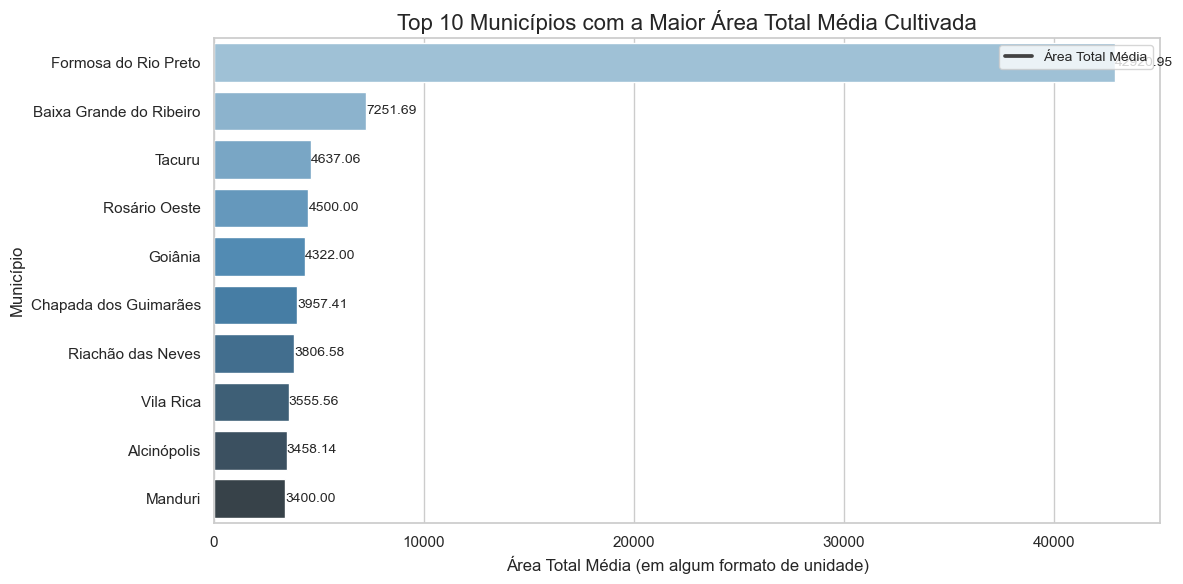

In [53]:

municipio_area_media = df.groupby('municipio')['areatotal'].mean().reset_index()
top_10_municipios = municipio_area_media.nlargest(10, 'areatotal')
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  
ax = sns.barplot(data=top_10_municipios, x='areatotal', y='municipio', orient='h', palette='Blues_d') 
plt.title('Top 10 Municípios com a Maior Área Total Média Cultivada', fontsize=16)
plt.xlabel('Área Total Média (em algum formato de unidade)', fontsize=12)
plt.ylabel('Município', fontsize=12)
for index, value in enumerate(top_10_municipios['areatotal']):
    ax.text(value, index, f'{value:.2f}', va='center', fontsize=10)
plt.legend(['Área Total Média'], loc='upper right', fontsize=10)

plt.tight_layout()  
plt.show()


#### Famosa do Rio Preto (42920.95): Este município tem a maior área total média cultivada entre todos os municípios em seu conjunto de dados. Isso indica que é uma região de grnade produção agrícola. 

#### Esses resultados significam que esses municípios são importantes na produção agrícola, com uma área média considerável destinada ao cultivo de plantas. Eles podem ser áreas de destaque na agricultura da região ou do país, e essa informação é valiosa para planejamento, análise de mercado e tomada de decisões no setor agrícola. Além disso, esses dados podem ser usados para investigar fatores que contribuem para a produtividade agrícola nessas áreas específicas.

C:\Users\User\AppData\Local\Temp\ipykernel_17548\1159960323.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='areatotal', y='especie', ci=None, orient='h', palette='viridis')


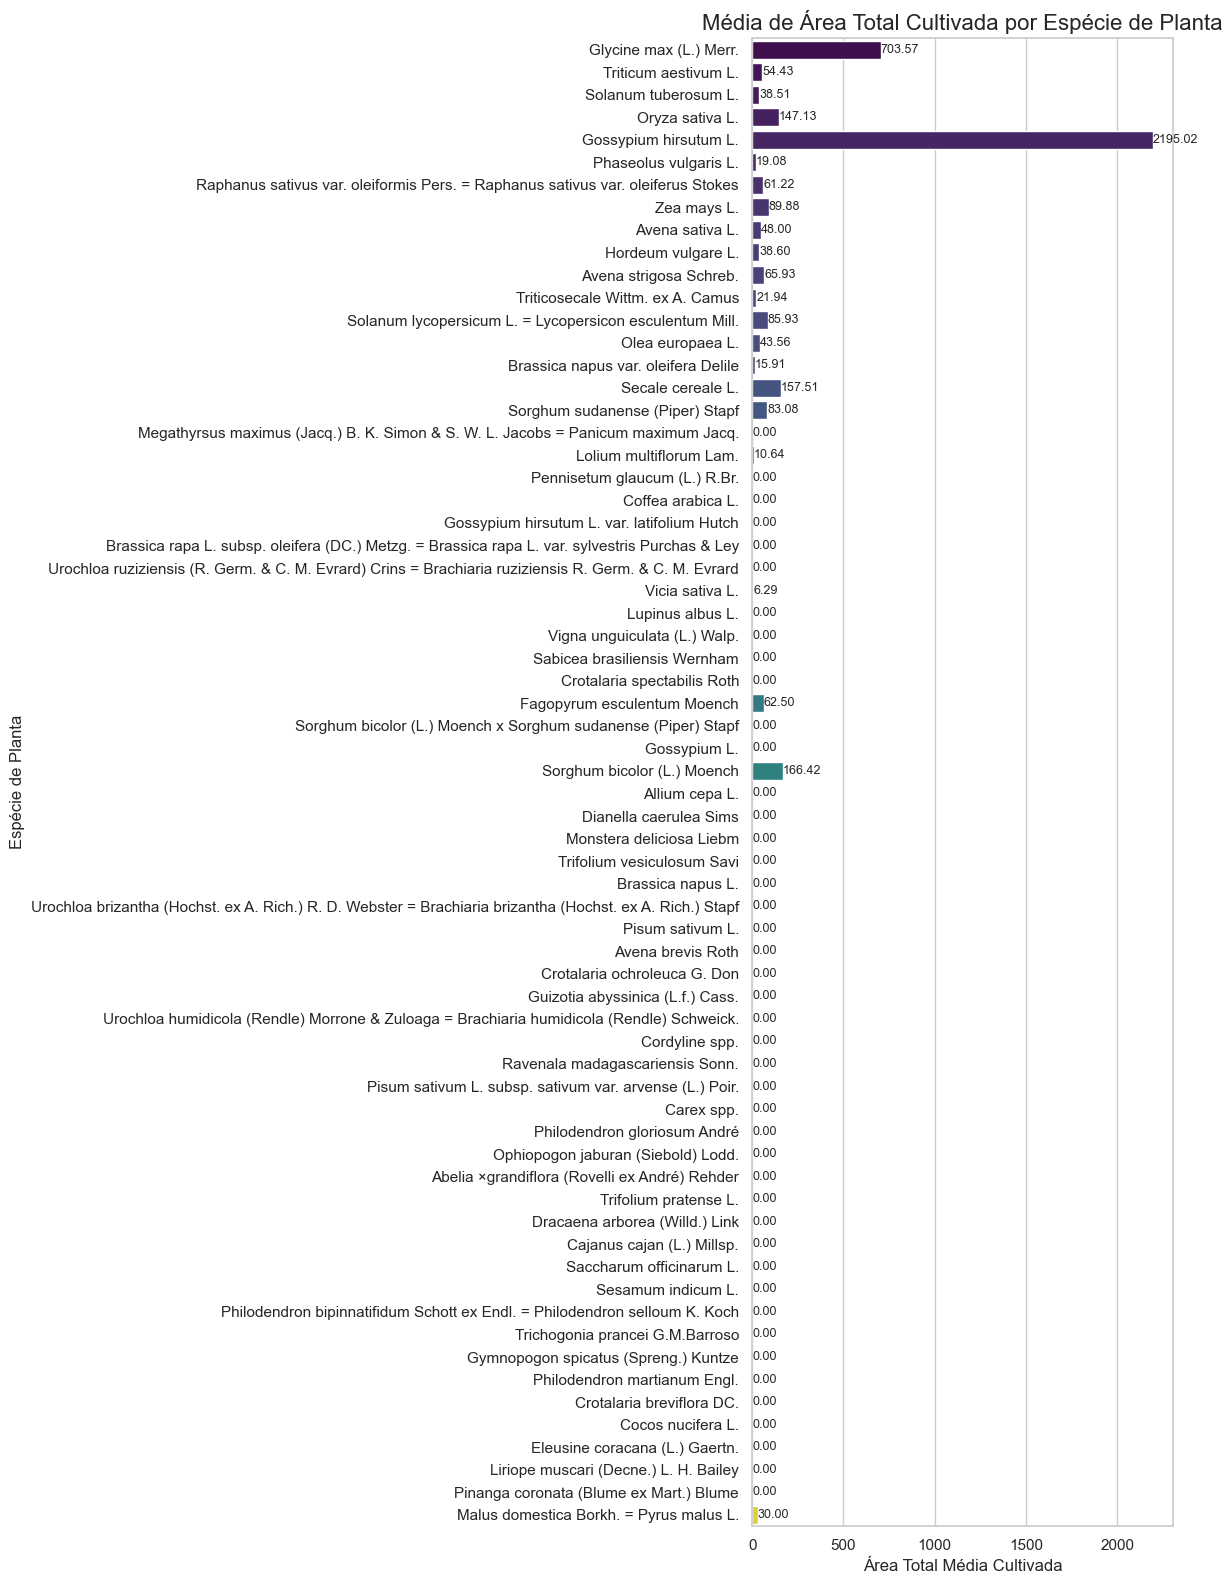

In [54]:
plt.figure(figsize=(12, 16))
sns.set(style="whitegrid")

ax = sns.barplot(data=df, x='areatotal', y='especie', ci=None, orient='h', palette='viridis')

plt.xlabel('Área Total Média Cultivada', fontsize=12)
plt.ylabel('Espécie de Planta', fontsize=12)
plt.title('Média de Área Total Cultivada por Espécie de Planta', fontsize=16)
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


#### Certos tipos de espécies de plantas são cultivados em áreas maiores do que outros") indica que, em média, essa espécie de planta tem uma área total cultivada de 2195.02 unidades (o tipo de unidade depende da escala de medição original, como hectares, acres etc.)

#### Este gráfico tem como objetivo explorar se existem diferenças significativas na área total cultivada entre diferentes espécies de plantas. O cálculo dessa hipótese é importante porque pode fornecer informações valiosas para a agricultura e a tomada de decisões.


C:\Users\User\AppData\Local\Temp\ipykernel_17548\1794398094.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_17548\1794398094.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


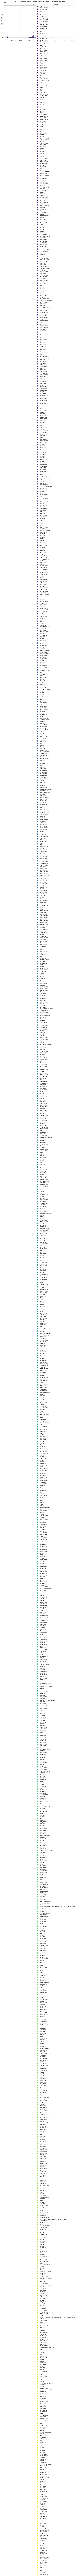

In [68]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.scatterplot(data=df, x='dataplantio', y='areaplantada', hue='cultivar', palette='viridis', alpha=0.5)
plt.xlabel('Data de Plantio', fontsize=12)
plt.ylabel('Área Plantada', fontsize=12)
plt.title('Relação entre Data de Plantio, Área Plantada e Variedade da Planta', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17548\125194813.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data=df, x='dataplantio', y='areaplantada', s=80,  alpha=0.6, palette='viridis')


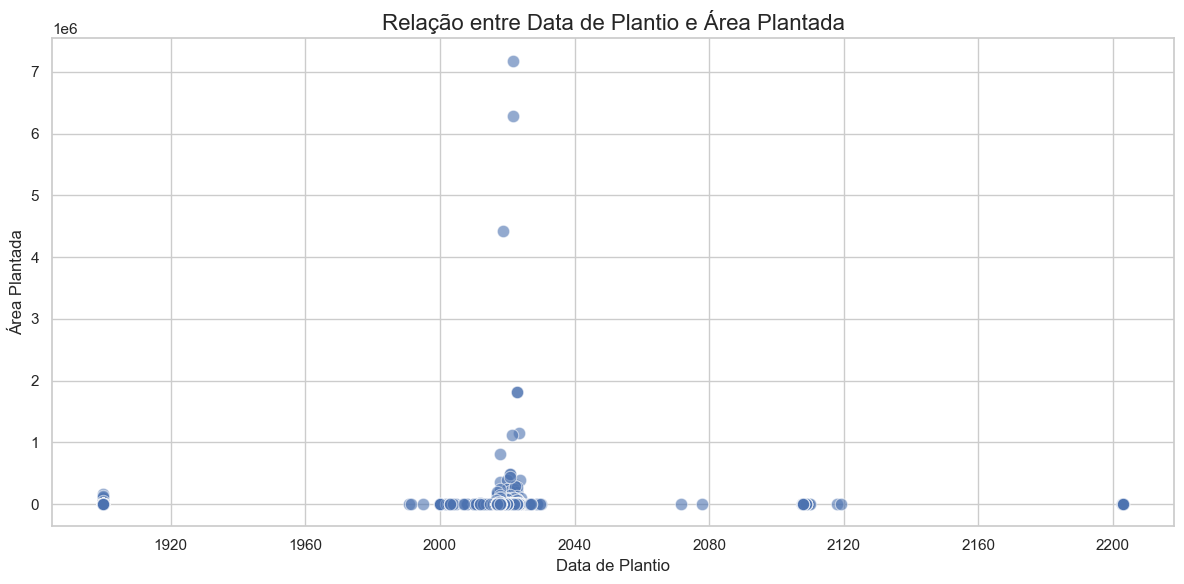

In [55]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.scatterplot(data=df, x='dataplantio', y='areaplantada', s=80,  alpha=0.6, palette='viridis')
plt.xlabel('Data de Plantio', fontsize=12)
plt.ylabel('Área Plantada', fontsize=12)
plt.title('Relação entre Data de Plantio e Área Plantada', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17548\1430085375.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='especie', y='quantreservada', ci=None, palette='viridis')


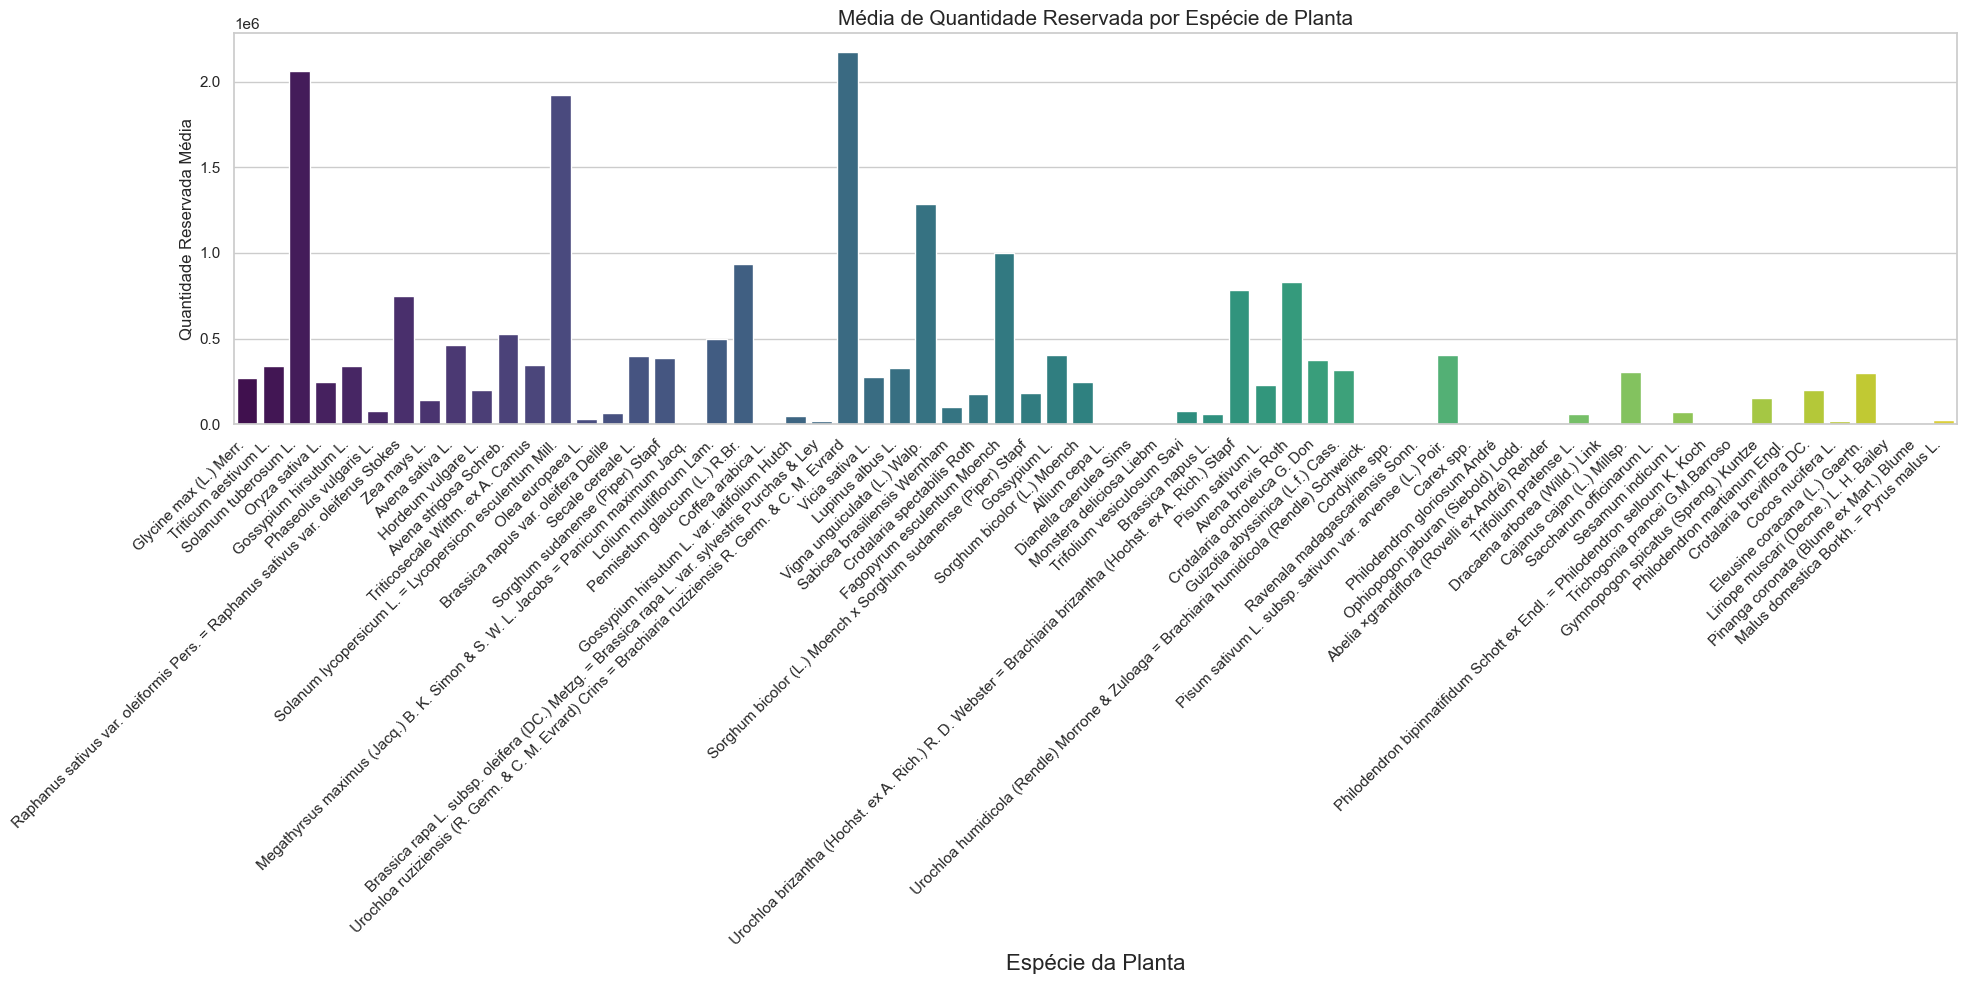

In [56]:


plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

ax = sns.barplot(data=df, x='especie', y='quantreservada', ci=None, palette='viridis')  

plt.xlabel('Espécie da Planta', fontsize=16)
plt.ylabel('Quantidade Reservada Média', fontsize=12)
plt.title('Média de Quantidade Reservada por Espécie de Planta', fontsize=15)
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()


#### Este gráfico fornece uma visão geral das espécies de plantas com as maiores quantidades reservadas. É uma maneira de resumir e comparar as médias de quantidade reservada entre as espécies de plantas, o que pode ser útil para tomar decisões ou entender a importância relativa das diferentes culturas em seu contexto específico.

#### E para quem não sabe o significado dessas 4 maiores espécies nos gráficos. 
*Solanum tuberosum (batata)*

*Solanum lycopersicum (tomate)*

*Urochloa riziziensis (braquiária)*

*Vigna unguiculata (feijão-de-corda)*

C:\Users\User\AppData\Local\Temp\ipykernel_17548\1332433259.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data=df, x='dataplantio', y='quantreservada', s=70, palette='viridis')


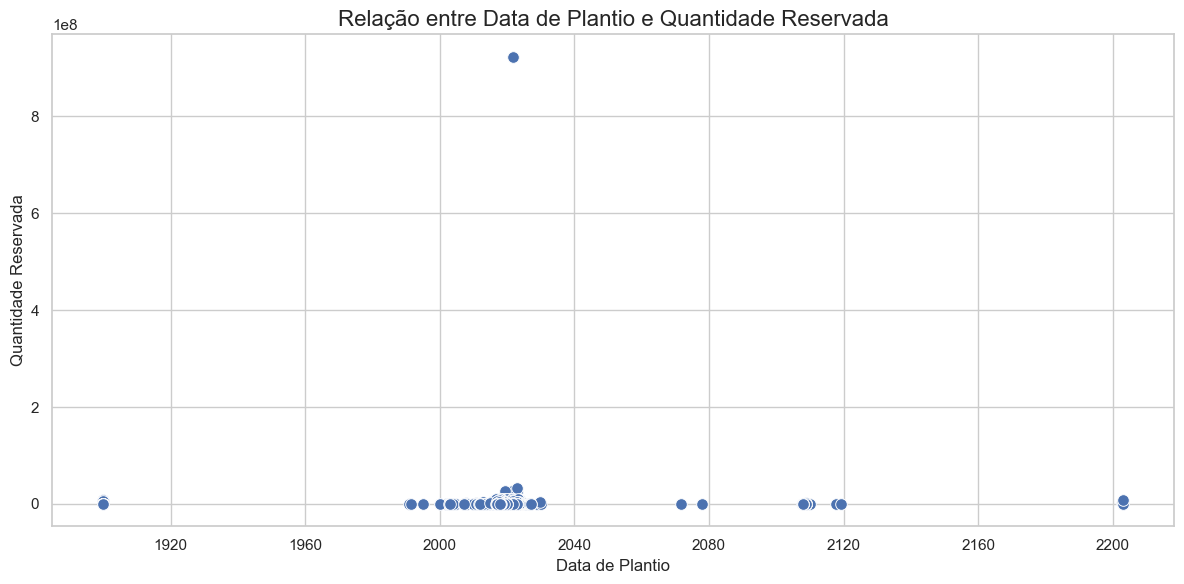

In [57]:


plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.scatterplot(data=df, x='dataplantio', y='quantreservada', s=70, palette='viridis')

plt.xlabel('Data de Plantio', fontsize=12)
plt.ylabel('Quantidade Reservada', fontsize=12)
plt.title('Relação entre Data de Plantio e Quantidade Reservada', fontsize=16)

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17548\2674466408.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='ano_plantio', y='quantreservada', ci=None, palette='viridis')


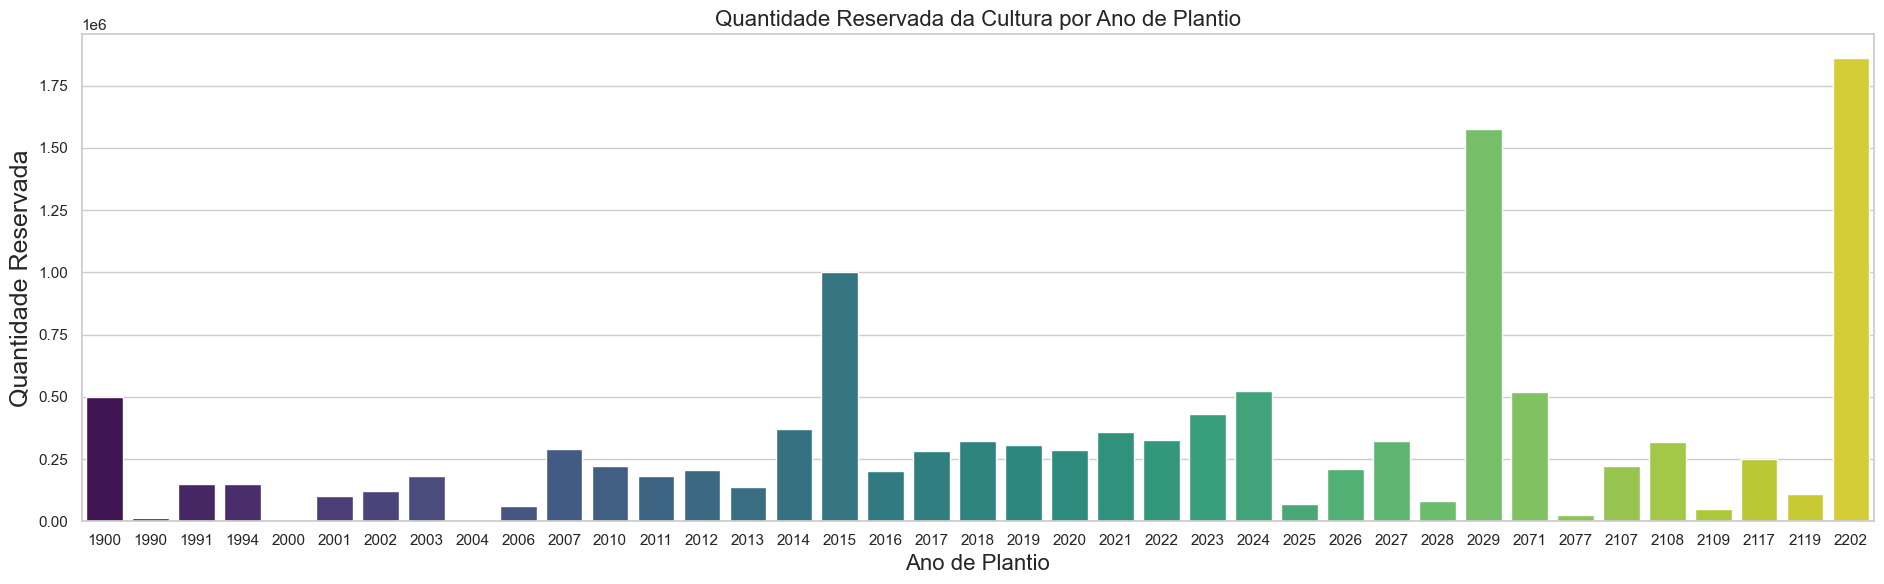

In [58]:


df['ano_plantio'] = df['dataplantio'].dt.year

plt.figure(figsize=(19, 6))
sns.set(style="whitegrid")

ax = sns.barplot(data=df, x='ano_plantio', y='quantreservada', ci=None, palette='viridis')

plt.xlabel('Ano de Plantio', fontsize=16)
plt.ylabel('Quantidade Reservada', fontsize=18)
plt.title('Quantidade Reservada da Cultura por Ano de Plantio', fontsize=16)

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17548\426039014.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='especie', y='areaplantada', ci=None, palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_17548\426039014.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


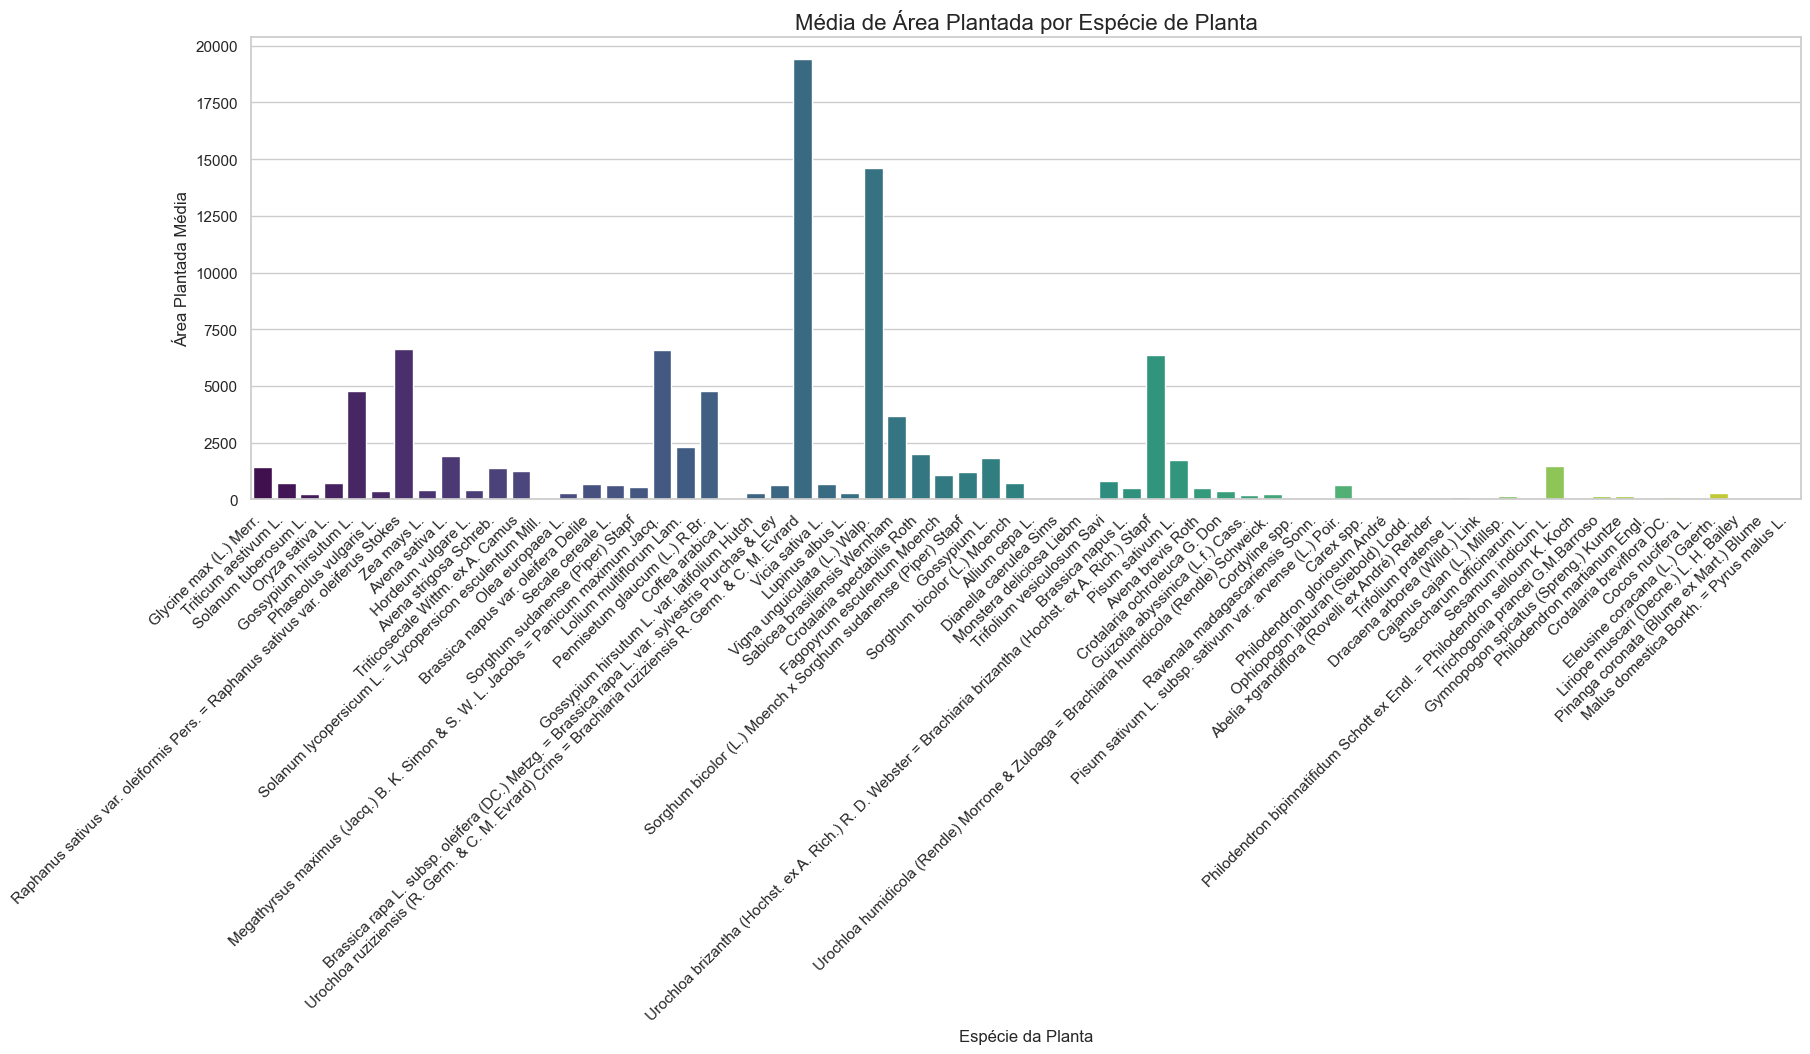

In [59]:

plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")

ax = sns.barplot(data=df, x='especie', y='areaplantada', ci=None, palette='viridis') 

plt.xlabel('Espécie da Planta', fontsize=12)
plt.ylabel('Área Plantada Média', fontsize=12)
plt.title('Média de Área Plantada por Espécie de Planta', fontsize=16)
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()


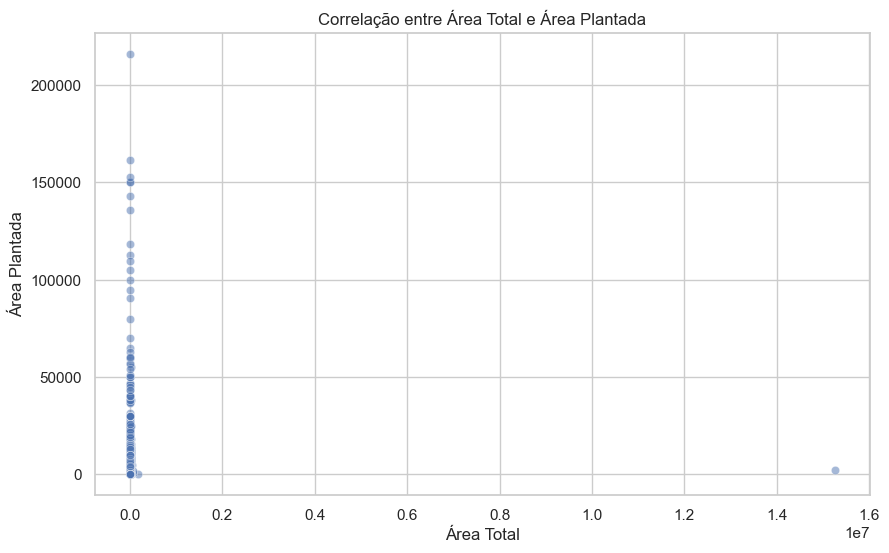

In [79]:


sample_df = df.sample(frac=0.1)  

plt.figure(figsize=(10, 6))
sns.scatterplot(x="areatotal", y="areaplantada", data=sample_df, alpha=0.5)

plt.title("Correlação entre Área Total e Área Plantada")
plt.xlabel("Área Total")
plt.ylabel("Área Plantada")

plt.show()


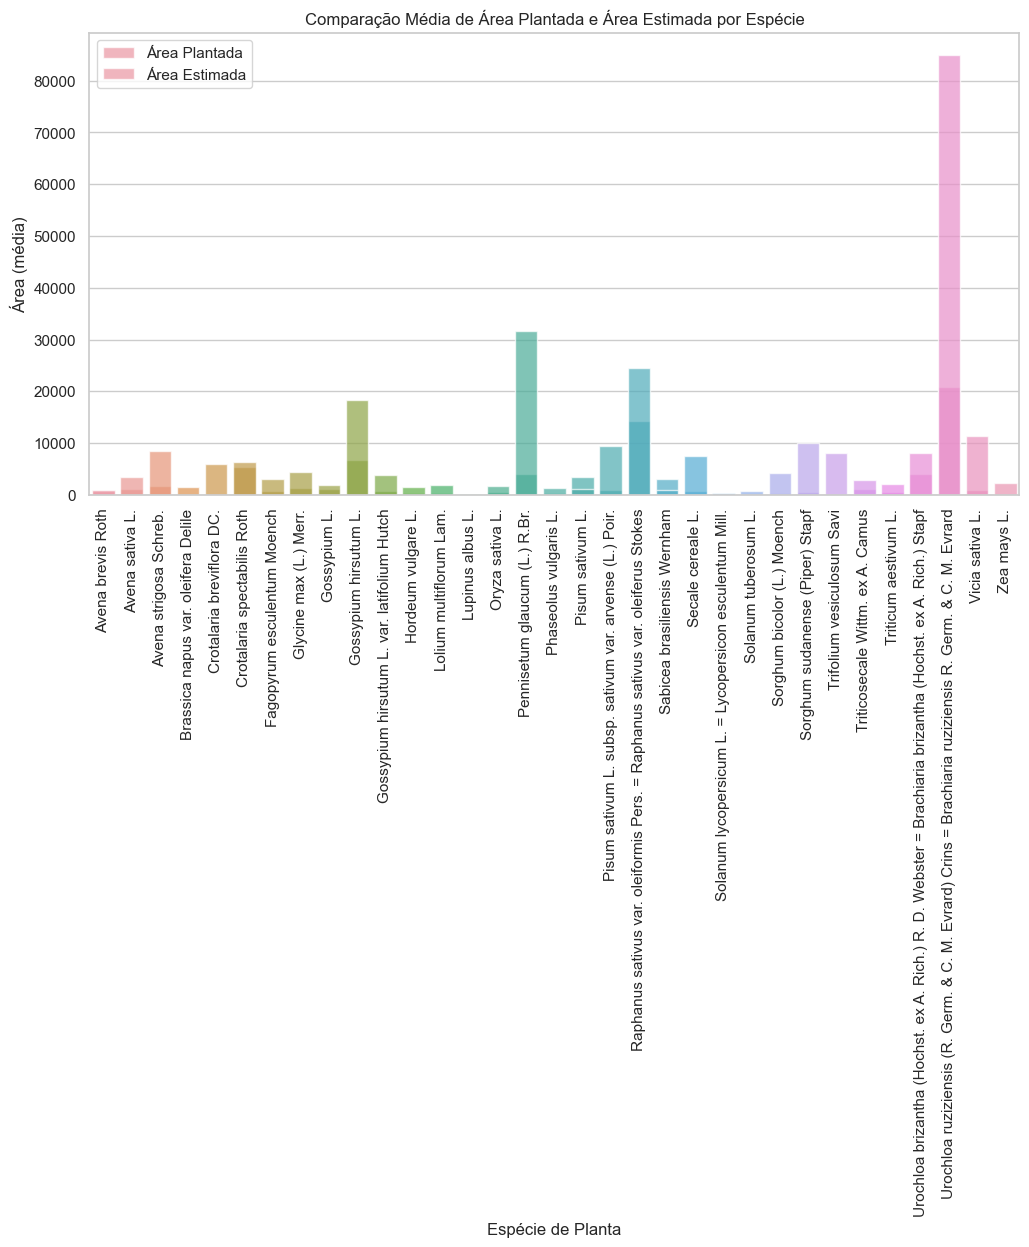

In [83]:

sample_df = df.sample(frac=0.1) 
agg_df = sample_df.groupby('especie')[['areaplantada', 'areaestimada']].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='especie', y='areaplantada', data=agg_df, label='Área Plantada', alpha=0.7)
sns.barplot(x='especie', y='areaestimada', data=agg_df, label='Área Estimada', alpha=0.7)

plt.xlabel("Espécie de Planta")
plt.ylabel("Área (média)")
plt.title("Comparação Média de Área Plantada e Área Estimada por Espécie")
plt.xticks(rotation=90)
plt.legend()

plt.show()


# DF1 Hip

Hipóteses Gerais:

H1: A produção agrícola está relacionada ao período de safra.
H2: A escolha da espécie de planta cultivada influencia a área plantada.
H3: A área plantada varia entre diferentes municípios e estados.
H4: Há uma correlação entre a data de plantio e a quantidade reservada.
H5: A área estimada difere da área plantada devido a perdas de colheita.
Hipóteses sobre Tipo de Período (TIPOPERIODO):

H6: Diferentes tipos de período afetam a produção agrícola.
Hipóteses sobre Período (PERIODO):

H7: A duração da safra (diferença entre ano de início e ano de fim) influencia a área total e a quantidade reservada.
Hipóteses sobre Área (AREATOTAL, AREAPLANTADA, AREAESTIMADA):

H8: A área total e a área plantada têm uma correlação positiva.
H9: A área estimada é maior do que a área plantada em média.
Hipóteses sobre Localização (MUNICIPIO e UF):

H10: Algumas espécies de plantas são mais comuns em determinados municípios ou estados.
Hipóteses sobre Espécie (ESPECIE):

H11: Algumas espécies são mais propensas a perdas de colheita do que outras.
Hipóteses sobre Cultivar (CULTIVAR):

H12: Diferentes cultivares da mesma espécie têm rendimentos diferentes.
Hipóteses sobre Quantidade Reservada (QUANTRESERVADA):

H13: A quantidade reservada está relacionada ao tipo de período.
H14: A quantidade reservada varia com a espécie cultivada.
Hipóteses sobre Data de Plantio (DATAPLANTIO):

H15: A data de plantio influencia a área plantada.
H16: O ano de plantio influencia a quantidade reservada.

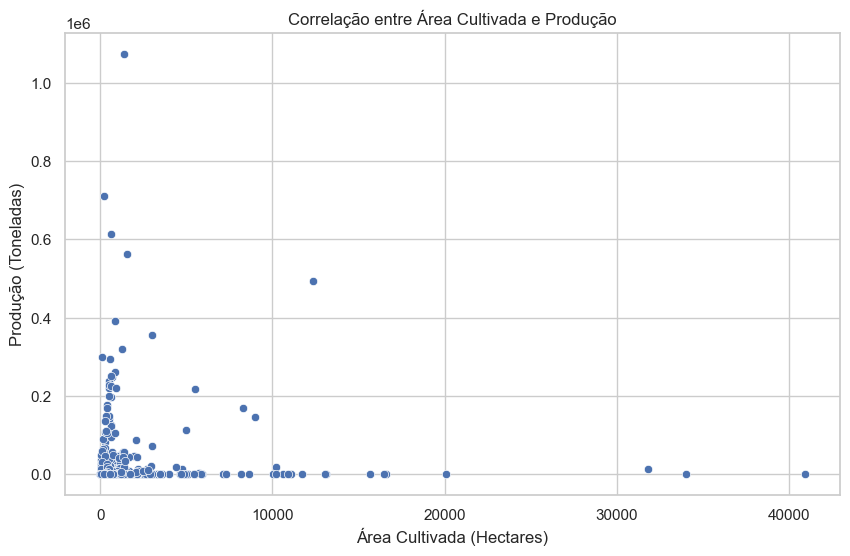

In [94]:
sample_data = df1.sample(n=1000)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='producao', data=sample_data)

plt.xlabel('Área Cultivada (Hectares)')
plt.ylabel('Produção (Toneladas)')
plt.title('Correlação entre Área Cultivada e Produção')

plt.show()

#### Claramente não apresenta uma distribuição clara, isso sugere que pode haver uma ausência de correlação linear direta entre a área cultivada e a produção agrícola nos seus dados. Mas isso não quer dizer que é um problema, mas sim uma informação que sugere que a relação entre área cultivada e produção agrícola é mais complexa do que uma simples correlação linear.

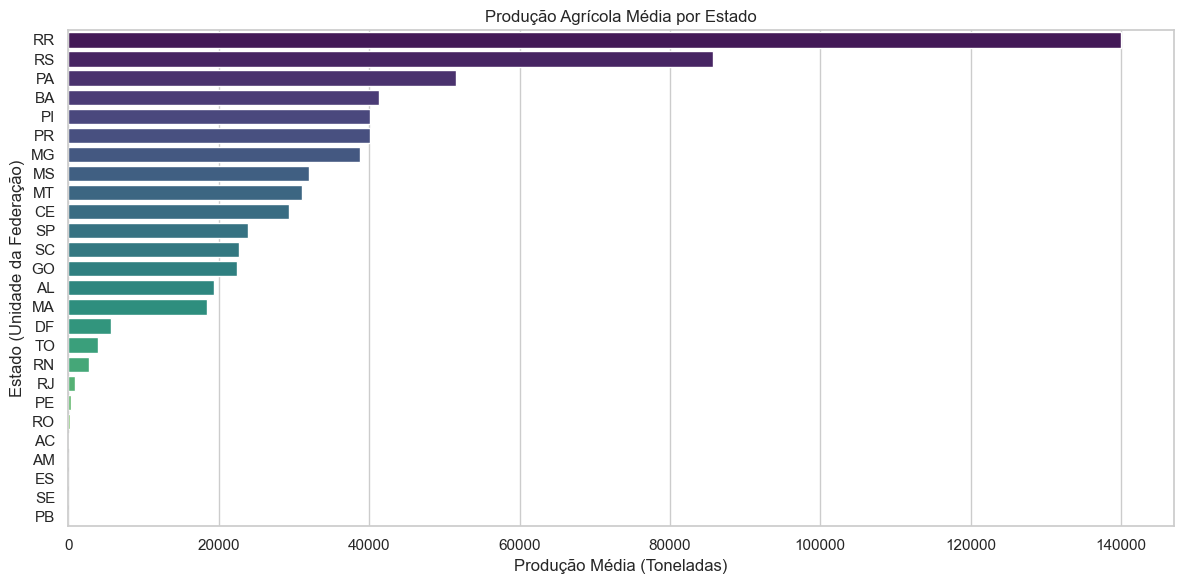

In [115]:


producao_por_estado = df1.groupby('uf')['producao'].mean().reset_index()
producao_por_estado = producao_por_estado.sort_values(by='producao', ascending=False)
plt.figure(figsize=(12, 6)) 
sns.barplot(x='producao', y='uf', data=producao_por_estado, palette='viridis')
plt.xlabel('Produção Média (Toneladas)')
plt.ylabel('Estado (Unidade da Federação)')
plt.title('Produção Agrícola Média por Estado')

plt.tight_layout()
plt.show()


#### Roraima (RR) provavelmente tem características geográficas, climáticas ou econômicas que a tornam propícia para a produção agrícola, resultando em uma produção média mais alta em comparação com o Rio Grande do Sul (RS).

# Tendência ao longo do tempo

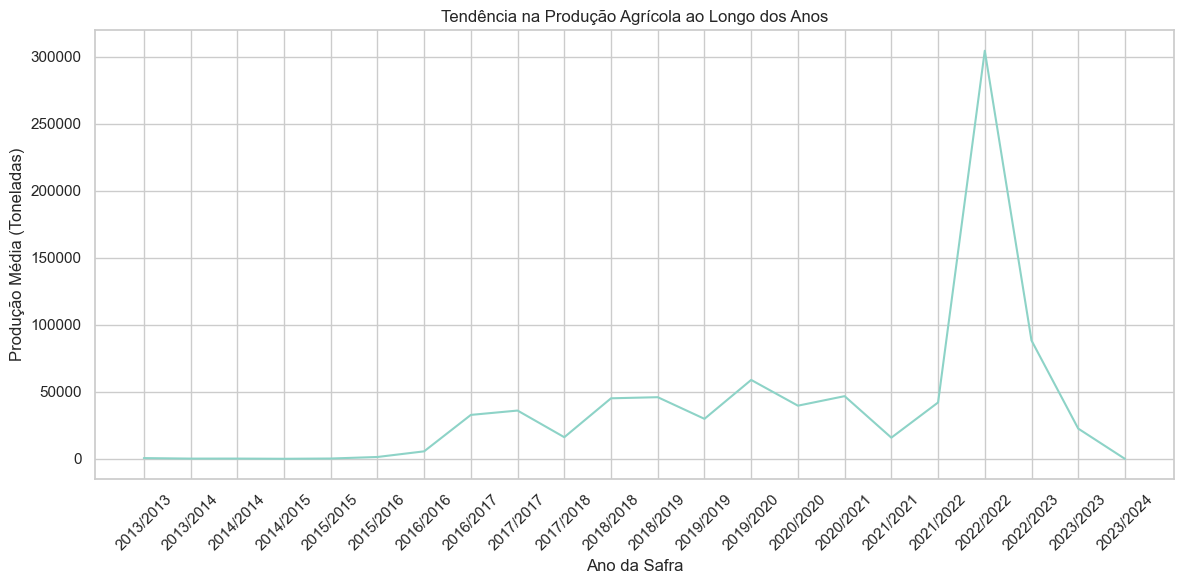

In [99]:

producao_por_ano = df1.groupby('safra')['producao'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='safra', y='producao', data=producao_por_ano)

plt.xlabel('Ano da Safra')
plt.ylabel('Produção Média (Toneladas)')
plt.title('Tendência na Produção Agrícola ao Longo dos Anos')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Produção por ano 

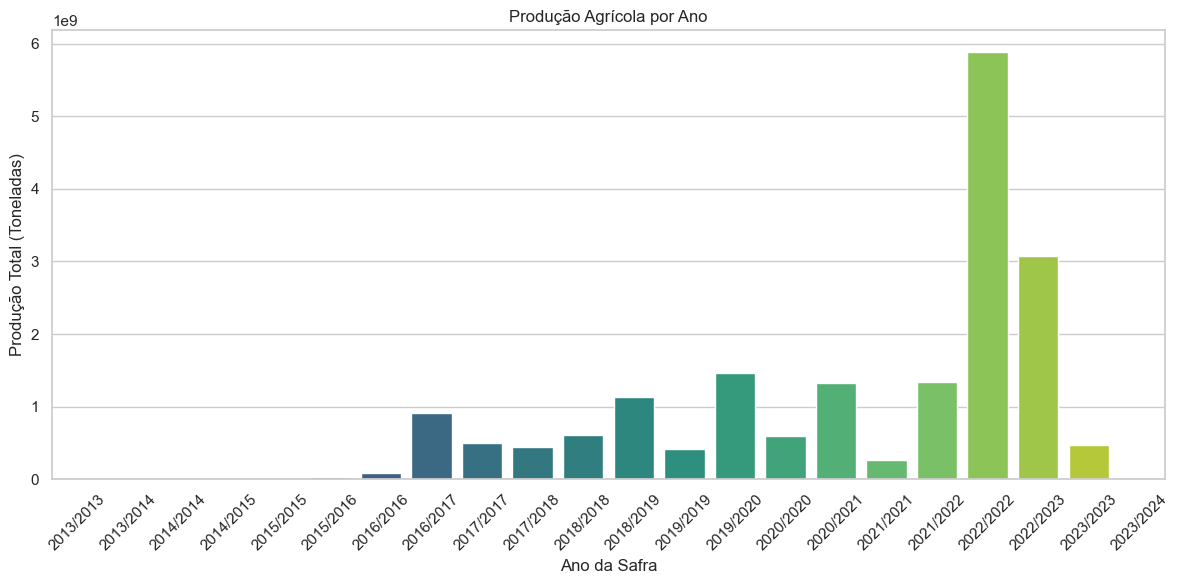

In [101]:
producao_por_ano = df1.groupby('safra')['producao'].sum().reset_index()

plt.figure(figsize=(12, 6)) 
sns.barplot(x='safra', y='producao', data=producao_por_ano, palette='viridis')

plt.xlabel('Ano da Safra')
plt.ylabel('Produção Total (Toneladas)')
plt.title('Produção Agrícola por Ano')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


#### Em resumo desses dois gráficos acima, uma linha que se eleva muito em um gráfico de produção agrícola entre "2021/2022" e "2022/2023" sugere um aumento significativo na produção nesse período. Essa elevação pode ser devida a uma variedade de fatores, como melhores condições climáticas, inovações tecnológicas, mudanças nas práticas agrícolas ou eventos sazonais. 

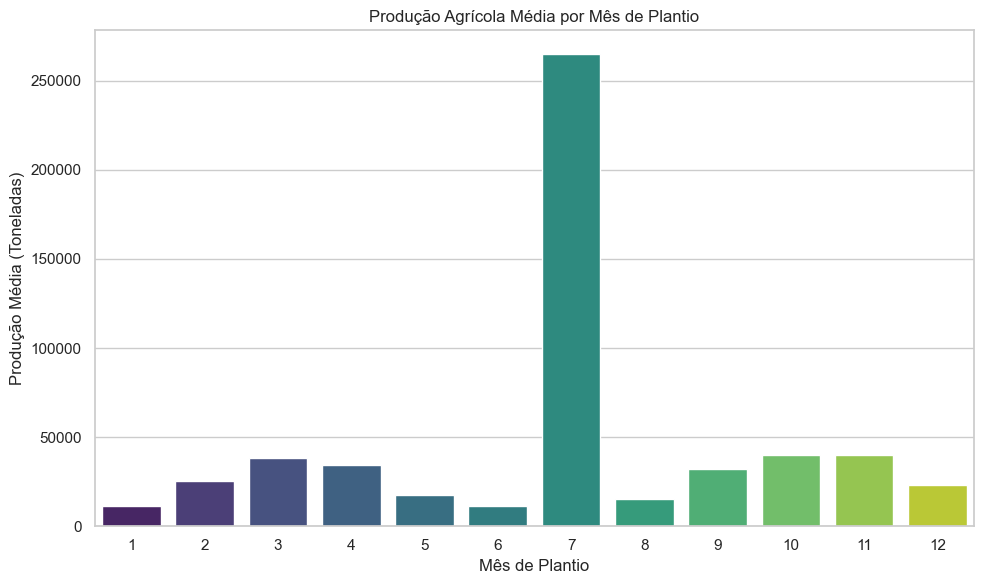

In [103]:

df1['mes_plantio'] = df1['data do plantio'].dt.month

producao_por_mes = df1.groupby('mes_plantio')['producao'].mean().reset_index()
plt.figure(figsize=(10, 6)) 
sns.barplot(x='mes_plantio', y='producao', data=producao_por_mes, palette='viridis')
plt.xlabel('Mês de Plantio')
plt.ylabel('Produção Média (Toneladas)')
plt.title('Produção Agrícola Média por Mês de Plantio')
plt.tight_layout()
plt.show()


#### O mês "7" apresenta a maior produção média em comparação com outros meses, isso significa que, em média, o mês de julho tende a ter a produção agrícola mais alta em seu conjunto de dados.

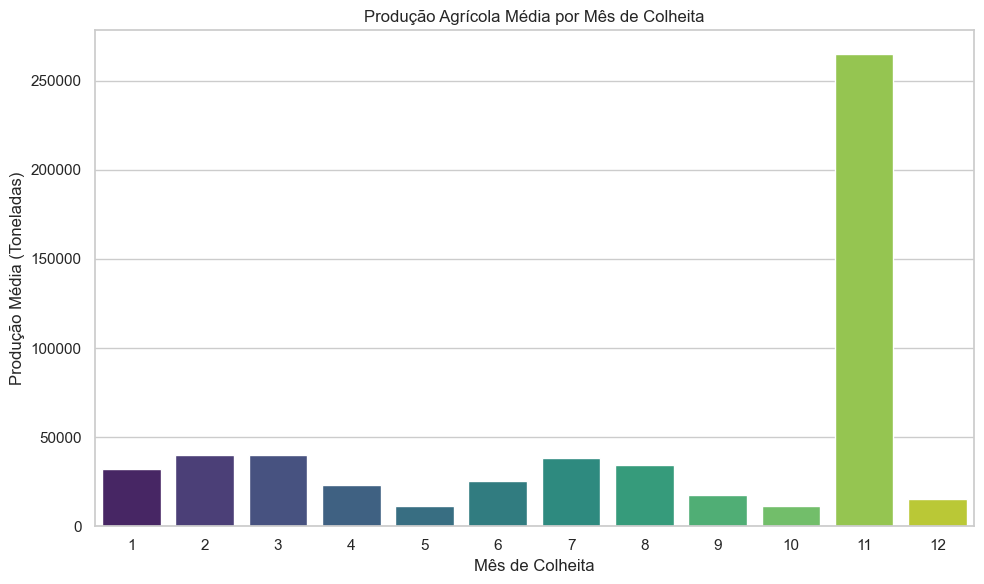

In [109]:
df1['mes_colheita'] = df1['data de colheita'].dt.month
producao_por_mes = df1.groupby('mes_colheita')['producao'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='mes_colheita', y='producao', data=producao_por_mes, palette='viridis')
plt.xlabel('Mês de Colheita')
plt.ylabel('Produção Média (Toneladas)')
plt.title('Produção Agrícola Média por Mês de Colheita')
plt.tight_layout()
plt.show()

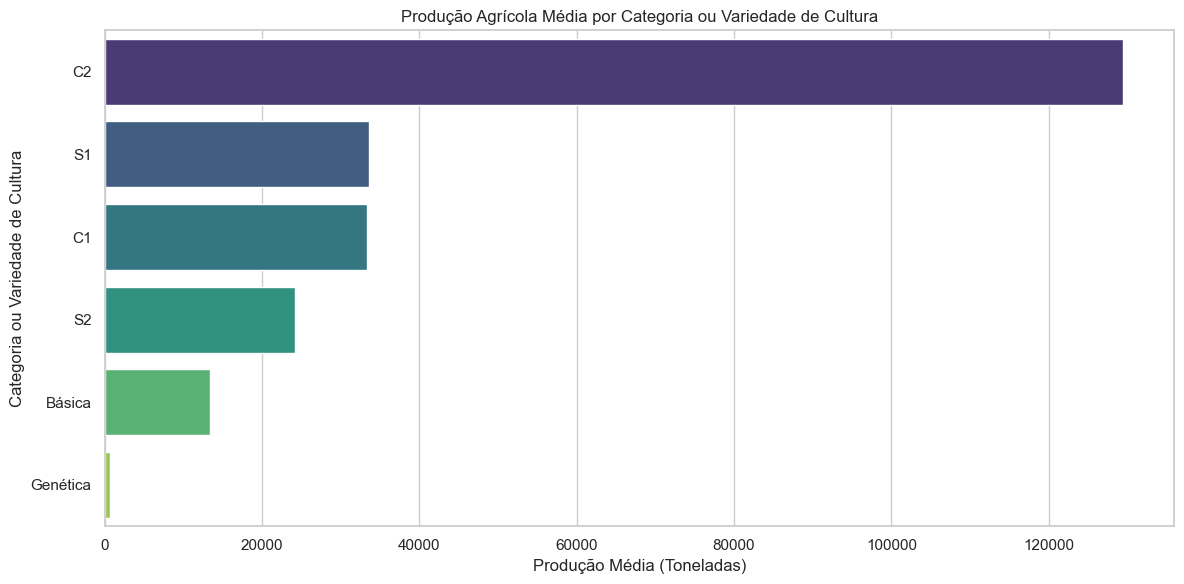

In [117]:

producao_por_categoria = df1.groupby('categoria')['producao'].mean().reset_index()
producao_por_categoria = producao_por_categoria.sort_values(by='producao', ascending=False)
plt.figure(figsize=(12, 6))  
sns.barplot(x='producao', y='categoria', data=producao_por_categoria, palette='viridis')
plt.xlabel('Produção Média (Toneladas)')
plt.ylabel('Categoria ou Variedade de Cultura')
plt.title('Produção Agrícola Média por Categoria ou Variedade de Cultura')
plt.tight_layout()
plt.show()


#### O resumo disso é que a categoria "C2" é a mais eficaz em termos de produção agrícola média em seu conjunto de dados. Isso pode ser útil em decisões relacionadas à agricultura, seleção de culturas ou variedades para o plantio e planejamento agrícola, uma vez que essa categoria pode ser considerada a mais produtiva com base nos dados disponíveis.